# Learning goals


This notebook is a refresher on basic **descriptive statistics**. It is assumed that this material has been covered in an undergraduate statistics course before. We will use our existing knowledge and practically apply it in Python. 

To this end, the main learning goals of this Chapter are:

**A/ Provide you with a quick refresher on**

- measures of location: mean, median, percentiles, quartiles
- measures of variability: range, variance, standard deviation
- measures of association between two variables: covariance and correlation

**B/ Practice coding in Python**

- we will implement most concepts from scratch
- we will learn that most concepts applied in this course have already been programmed in python and packaged into modules
- we will start using some relevant modules


# Measures of location

A location parameter of a (probability) distribution is a scalar parameter, which determines the "location" or shift of the distribution. 

We will be using the following monthly sales data from **Statistics Inc.**:

| Month | Sales |
|:-----:|:-----:|
|   1   |  2020 |
|   2   |  2075 |
|   3   |  2125 |
|   4   |  2040 |
|   5   |  1980 |
|   6   |  1955 |
|   7   |  2050 |
|   8   |  2165 |
|   9   |  2070 |
|   10  |  2260 |
|   11  |  2060 |
|   12  |  2040 |

In [ ]:
def load_sales():
    return [2020,2075, 2125, 2040, 1980, 1955, 2050, 2165, 2070, 2260, 2060, 2040]

In [ ]:
sales = load_sales()

## Mean

### Definition

Likely the most important and most known measure of location is the `mean`, also called average value for a given variable.

Two different means depending on the data:

1. if data from a sample: mean is denoted by $\bar{x}$

2. if data from a population: mean is denoted by $\mu$

The value of variable $X$ for the $i^{th}$ observation is denoted by $x_i$.

**Sample mean** for a sample with $n$ observations:

$$\bar{x} = \frac{\sum{x_i}}{n}$$

**Population mean** is the same (except for different notation):

$$\mu = \frac{\sum{x_i}}{N}$$

> **Note** The result for sample and population mean is identical. We use different notation only to indicate whether mean is from population or sample. 

### Implementation 

The mean can easily be calculated using the below python code

In [ ]:
x_bar = sum(sales)/len(sales)
x_bar

If we intend to apply the calculation of a mean on various variables, it is handy to put the concept into a function

In [ ]:
def mean(lst):
    return sum(lst)/len(lst)

In [ ]:
mean(sales)

## Median

### Definition

The median is another measure of location. The median is the middle value when data is sorted in ascending order. 

**Median**

1. Arrange the data in ascending order
2. Determine number of elements
3. Calculate median:
    1. for an odd number of observations, the median is the middle value
    2. for an even number of observations, the median is the average of the two middle values

### **Naive implementation**

A simple and naive implementation of mean would look as follows:

Elements: 0 1 2 3 4 **5 6** 7 8 9 10 11

We need to take the average of indices 5 and 6. 

In [ ]:
(sales[5] + sales[6])/2

In [ ]:
mean([sales[5], sales[6]])

This approach is, however, not reproducabel with other lists. 

### **Better implementation**

Let's calculate the mean of the sales data by following the above steps in a more general form. We need to introduce 

- `list.sort()`: a method (i.e. function) for lists sorting lists in ascending order
- `comparison operators`: operators to compare two values (e.g. if a is greater than b)
- `if conditions`: instruct python what to do if a statement is true or false

**1. Sort sales data in ascending order**

In [ ]:
sales.sort()

**2. Determine number of elements**

In [ ]:
n = len(sales)

**3. Calculate median depending by checking if odd or even number of elements**

In [ ]:
if n % 2 == 0: # List has even number of elements
    el1 = sales[n//2]
    el2 = sales[n//2 - 1]
    median = (el1 + el2)/2
else: # List has odd number of elements
    median = sales[n//2]
median

In [ ]:
def median(lst):
    lst.sort()
    n = len(lst)
    
    if n % 2 == 0: # List has even number of elements
    
        el1 = lst[n//2]
        el2 = lst[n//2 - 1]
        median = (el1 + el2)/2
    
    else: # List has odd number of elements
        
        median = lst[n//2]
    
    return median

In [ ]:
numbers = [1,2,3,4,5,6]
median(numbers)

### **Why is median important**

Advantage of median of mean: mean is influenced by small or large outliers. This is not the case for the median. 

Example:

In [ ]:
sales_with_outliers = sales + [100_000]
sales_with_outliers

In [ ]:
mean(sales_with_outliers)

In [ ]:
median(sales_with_outliers)

## Mode

### Definition

Another measure of location is the `mode`. 

**Mode**: the mode is the value that occurs most often within a set of numbers.

If there are no repeats in the data the mode is not defines. 

The mode is an important measure of location for qualitative data (i.e. non numeric data). A data set can have more than one mode. A data set with two modes is called bimodal. A data set with more than two modes is called multimodal. 

Similar to the median the mode is not affected by extreme outlieres.

### Implementation from scratch

While the statistical concept is straight forward the implementation in Python is not trivial for beginners.

Here is one possible implementation from scratch (don't worry if it is not entirely clear to you)

In [ ]:
max(set(sales), key=sales.count)

### Implementation using modules

We have reached a point where it becomes quite tedious to implement all concept from scratch. Luckily, most of the concepts we will be using in this class (or actually most concepts in statistics or data analysis) have already been implemented in Python and can `imported` into python. 

We need to introduce a new concept:

- `import modules`: use (e.g. statistical) concepts that have already been implemented in Python

In [ ]:
import statistics

In [ ]:
statistics.mode(sales)

In [ ]:
letters = ["a","b","b","a","d","a","a","c"]
statistics.mode(letters)

## Percentiles

### Definition

A percentile provides information about how the data is spread over the interval from smallest value to largest value.

> **Percentile** is defined as:
> 
> The $p^{th}$ percentile is a value such that *at least* $p$ percent of the observations are less than or equal to this value > and *at least* $(100 - p)$ per cent of the observations are greater than or equal to the value.

In statistics percentiles are often used to (i) express the spread of data and (ii) to remove outliers (e.g. every value $> 95^{th}$ percentile is removed).

**Calculation** of the $p^{th}$ percentile is done in three steps:

1. Sort the data in ascending order (i.e. smallest to largest value)

2. Compute an index $i$

$$i = \bigg(\frac{p}{100}\bigg)\times n$$

where $p$ is the percnetile of interest and n is the number of observations. 

3. Two options:

    1. if $i$ is __not__


In [196]:
numbers = [1,2,3,2,3,1,1000]

In [201]:
import numpy as np
import matplotlib.pyplot as plt

In [211]:
ret = np.random.normal(size=10000)

In [212]:
np.percentile(ret,q=1)

-2.3459481802886377

In [203]:
percentiles = [np.percentile(numbers, q=i) for i in range(1,101)]

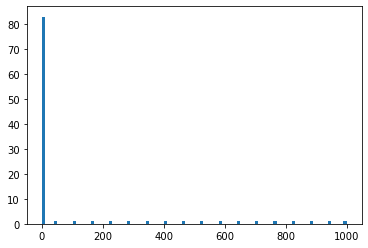

In [207]:
plt.hist(percentiles, bins=100);

# New Python concepts

## New functions

list.`sort()`: 

- sorts a list in ascending order and can be applied to any list object. 
- is an inplace method meaning the method doesn't return a new list, but sorts the existing list

In [195]:
names = ["Denise","Beatrix","Adam", "Zack"]
names.sort() # or names.sort(reverse=False)
names

['Adam', 'Beatrix', 'Denise', 'Zack']

In [ ]:
names.sort(reverse=True)
names

In [ ]:
list.sort?

## Comparison operators

With these operators we can compare two variables. In Python you can use the following comparison operators

| Operator | Name                     |
|:--------:|--------------------------|
|    ==    | Equal                    |
|    !=    | Not equal                |
|     >    | Greater than             |
|     <    | Less than                |
|    >=    | Greater than or equal to |
|    <=    | Less than or equal to    |

Comparison operators return `true` if comparison is true else they return `false`.

Let's look at some examples:

In [ ]:
a = 10
b = 12
a > b

In [ ]:
a != b

In [ ]:
name1 = "Felix"
name2 = "Riza"
len(name1) < len(name2)

In [ ]:
n1 = [1,2,3,4]
n2 = [4,3,2,1]
sum(n1) == sum(n2)

## If condition

If statements are very useful as the run code depending on a test condition. 

So syntax in Python is as follows:

```Python
if condition:
    do something
```

We can also write:

```Python
if condition:
    do something
else: 
    do something differently
```

If we want to test more than one condition we can do this with the `elif` keyword

```Python
if condition1:
    do something
elif condition2: 
    do something differently
else:
    do something by default
```

**Example**: let's write a function that tests if a number is big or not. Any number above $100$ is defined as big

In [ ]:
def is_big(number):
    if number > 100:
        print(number, "is a big number")
    else: 
        print(number, "is a small number")

In [ ]:
is_big(12)

In [ ]:
is_big(101)

## Importing modules

Most of the functionality we are using has been programmed and packaged into a specific module. We can access a module with the keyword `import`. After importing a module we can then use it and access the associated objects and methods.

```Python
import module_name

module_name.module_function()

```

> **Note**: importing a module requires most modules to be downloaded and installed first. This will be explained in more detail in due course

**Example**: below we are importing the module`statistics` which provides basic functionality for statistical analysis.

In [ ]:
import statistics

Once the above cell is executed we can use the module. Here we are using the `mean` function from statistics

In [ ]:
visitors = [80000, 75000, 78000,80500, 80140]
statistics.mean(visitors)

We will gradually introduce some additional modules that are integral for doing data analysis in python. Some of the most important package we will learn about are:

- `numpy`: module for numerical analysis
- `pandas`: module for tabular data and dataframes
- `matplotlib`: module for visualizations
- `scipy`: module for scientific analysis
- `sklearn`: module for machine learning